In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import hdf5storage
import ast

from matplotlib.pyplot import cm
import matplotlib.colors as mcolors


### Experimental data, 5 Runs for R = 470, 1000 each, Averaging over the runs

In [2]:
vs = np.array([1,2,3,4,5]) # supply voltage
vc = np.arange(1.2, 3+0.01, 0.01) # coupling voltage


In [6]:
if not os.path.exists("./images/"): 
    os.makedirs("./images/") 


for R in [470, 1000]:
    if not os.path.exists("./images/R%d"%R): 
                os.makedirs("./images/R%d"%R)

    for type in ["raw", "norm"]:
        if not os.path.exists("./images/R%d/%s"%(R,"avg_%s"%type)): 
                os.makedirs("./images/R%d/%s"%(R,"avg_%s"%type))
                

In [4]:
df = pd.read_csv("pred_clusters.csv")
clusters = df.cluster.tolist()
clusters = [ast.literal_eval(s) for s in clusters]
clusters_dict= {}

for i in range(len(clusters)):
        #print(clusters[i])
        clusters_dict["C%d"%(i+1)] = clusters[i]

In [16]:
%%time
for R in [470, 1000]:
    print("R =",R)

    for type in ["raw", "norm"]:
        print(type)        
        
        for vs_ in range(len(vs)):
            print("Vs =",vs[vs_])
            
            err = np.zeros((5, len(clusters_dict), len(vc))) # clusters error
            err_glob = np.zeros((5, len(vc))) # glob error
                            
            for run in [1,2,3,4,5]:        
                print(run)
    
                #data = loadmat("./data/experimental data/allresults_r%d.mat"%R)
                data = hdf5storage.loadmat("./experimental data/%s/allresults_r%d_run%d_%s"%(type, R,run, type))
                
                for i in range(len(clusters_dict)):
                    cl_num = list(clusters_dict.keys())[i]
                    cl = clusters_dict[cl_num]
                    cluster_indices = np.array(cl)-1

                    # cluster sync error
                    for j in range(len(vc)):
                        A = data["allresults"]["e"][vs_][j]
                        err[run-1, i, j] += np.mean(A[cluster_indices,:][:,cluster_indices])
                    
                # Global sync error
                for j in range(len(vc)):
                    A = data["allresults"]["e"][vs_][j]
                    err_glob[run-1, j] = np.mean(A)

            plt.figure(figsize=(10, 6))
            
            #color = cm.rainbow(np.linspace(0, 1, len(clusters_dict)))
            # Increase saturation of colors
            base_colors = cm.rainbow(np.linspace(0, 1, len(clusters_dict)))
            color = [mcolors.rgb_to_hsv(c[:3]) for c in base_colors]
            for c in color:
                c[1] = min(1, c[1] * 1.5)  # Increase saturation by 50%
            color = [mcolors.hsv_to_rgb(c) for c in color]

            for i in range(len(clusters_dict)):
                cl_num = list(clusters_dict.keys())[i]
                cl = clusters_dict[cl_num]
                plt.plot(vc, np.mean(err, 0)[i], 
                            label="%s = %s"%(cl_num, clusters_dict[cl_num]), color=color[i], linewidth=2.5)
            
            plt.plot(vc, np.mean(err_glob, 0) ,"--", color="k", label="Global error",linewidth=2.5)
            
            plt.legend(loc='best', prop={'size': 7})
            
            plt.ylabel("Avg. Synchronization error", size=15)
            plt.xlabel("$V_c$(in V)", size=15)
            plt.tick_params(axis='both',labelsize=12)
                
            #plt.title(r"Experimental data, $R = %d \Omega$, $V_s = %dV$"%(R, vs[vs_]))
            if type=="norm":
                type1 = "avg_norm"
                plt.savefig("./images/R%d/%s/R%d_Vs%d_%s.pdf"%(R,type1,R,vs[vs_],type1), 
                            facecolor="white", bbox_inches="tight", dpi=600)
            else:
                type1 = "avg_raw"
                plt.savefig("./images/R%d/%s/R%d_Vs%d_%s.pdf"%(R,type1,R,vs[vs_],type1), 
                            facecolor="white", bbox_inches="tight", dpi=600)
            plt.close()
            #plt.show()

R = 470
raw
Vs = 1
1
2
3
4
5
Vs = 2
1
2
3
4
5
Vs = 3
1
2
3
4
5
Vs = 4
1
2
3
4
5
Vs = 5
1
2
3
4
5
norm
Vs = 1
1
2
3
4
5
Vs = 2
1
2
3
4
5
Vs = 3
1
2
3
4
5
Vs = 4
1
2
3
4
5
Vs = 5
1
2
3
4
5
R = 1000
raw
Vs = 1
1
2
3
4
5
Vs = 2
1
2
3
4
5
Vs = 3
1
2
3
4
5
Vs = 4
1
2
3
4
5
Vs = 5
1
2
3
4
5
norm
Vs = 1
1
2
3
4
5
Vs = 2
1
2
3
4
5
Vs = 3
1
2
3
4
5
Vs = 4
1
2
3
4
5
Vs = 5
1
2
3
4
5
CPU times: user 19min 21s, sys: 9.06 s, total: 19min 30s
Wall time: 19min 23s


In [ ]:
# Figures to be aesthetically redone for paper
# type=raw
# Vs=5, R=470, 1000 ohms


R = 470
raw
Vs = 5
1
2
3
4
5


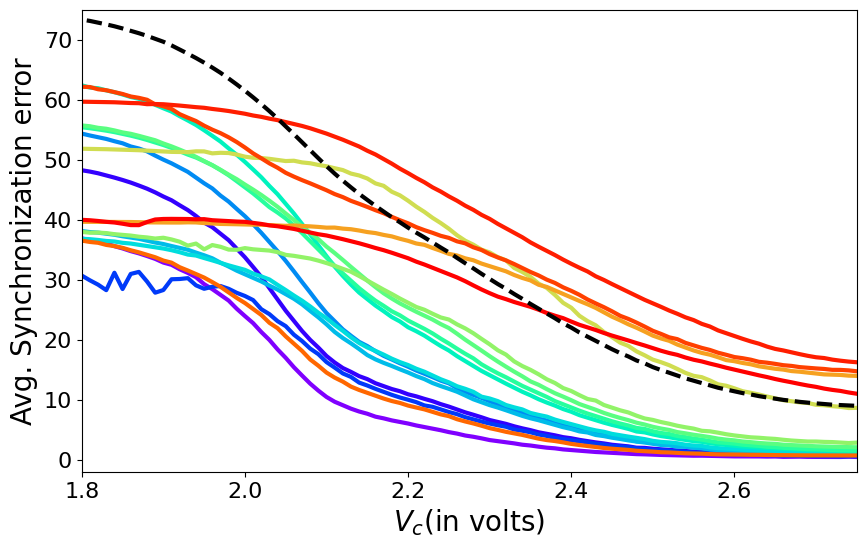

R = 1000
raw
Vs = 5
1
2
3
4
5


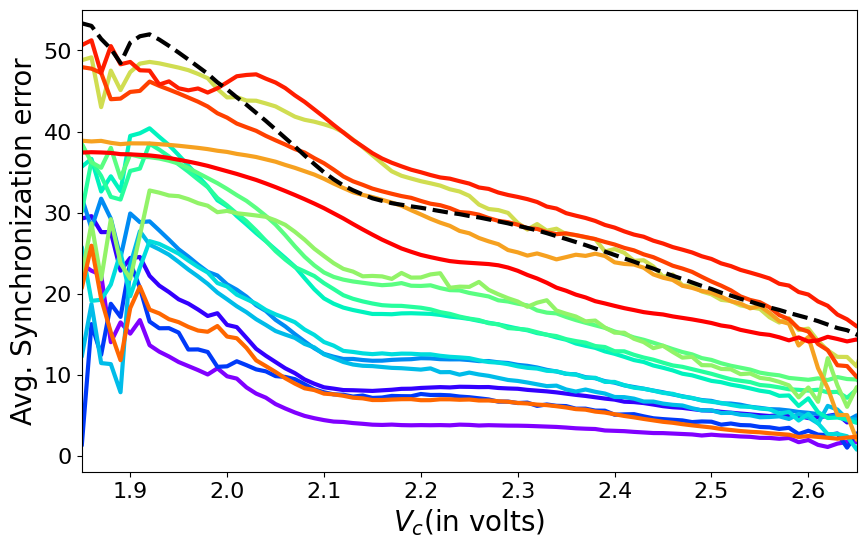

CPU times: user 1min 56s, sys: 957 ms, total: 1min 57s
Wall time: 1min 58s


In [12]:
%%time
for R in [470, 1000]:
    print("R =",R)

    #for type in ["raw", "norm"]:
    type="raw"    
    print(type)
    
    vs_ = 4
    print("Vs =",vs[vs_])
    
    err = np.zeros((5, len(clusters_dict), len(vc))) # clusters error
    err_glob = np.zeros((5, len(vc))) # glob error
                    
    for run in [1,2,3,4,5]:        
        print(run)

        #data = loadmat("./data/experimental data/allresults_r%d.mat"%R)
        data = hdf5storage.loadmat("./experimental data/%s/allresults_r%d_run%d_%s"%(type, R,run, type))
        
        for i in range(len(clusters_dict)):
            cl_num = list(clusters_dict.keys())[i]
            cl = clusters_dict[cl_num]
            cluster_indices = np.array(cl)-1

            # cluster sync error
            for j in range(len(vc)):
                A = data["allresults"]["e"][vs_][j]
                err[run-1, i, j] += np.mean(A[cluster_indices,:][:,cluster_indices])
            
        # Global sync error
        for j in range(len(vc)):
            A = data["allresults"]["e"][vs_][j]
            err_glob[run-1, j] = np.mean(A)

    plt.figure(figsize=(10, 6))
    
    #color = cm.rainbow(np.linspace(0, 1, len(clusters_dict)))
    # Increase saturation of colors
    base_colors = cm.rainbow(np.linspace(0, 1, len(clusters_dict)))
    color = [mcolors.rgb_to_hsv(c[:3]) for c in base_colors]
    for c in color:
        c[1] = min(1, c[1] * 1.5)  # Increase saturation by 50%
    color = [mcolors.hsv_to_rgb(c) for c in color]

    for i in range(len(clusters_dict)):
        cl_num = list(clusters_dict.keys())[i]
        cl = clusters_dict[cl_num]
        plt.plot(vc, np.mean(err, 0)[i], 
                    label="%s = %s"%(cl_num, clusters_dict[cl_num]), color=color[i], linewidth=3)
    
    plt.plot(vc, np.mean(err_glob, 0) ,"--", color="k", label="Global error",linewidth=3)
    
    #plt.legend(loc='best', prop={'size': 7})
    
    plt.ylabel("Avg. Synchronization error", size=20)
    plt.xlabel("$V_c$(in volts)", size=20)
    plt.tick_params(axis='both',labelsize=16)
    
    if R == 470: 
        plt.xlim([1.8, 2.75])
        plt.ylim([-2, 75])
    elif R==1000:
        plt.xlim([1.85, 2.65])
        plt.ylim([-2, 55])
        
    type1 = "avg_raw"
    plt.savefig("./images/R%d_Vs%d_%s.pdf"%(R,vs[vs_],type1), 
                facecolor="white", bbox_inches="tight", dpi=600)
    #plt.close()
    plt.show()